# Rain Prediction in Australia

In [1]:
# import libraries
import numpy as np
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
# load dataset
df = pd.read_csv('weatherAUS.csv')
df

,Date,Location,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,WindDir9am,...,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday,RainTomorrow
0,2008-12-01,Albury,13.4,22.9,0.6,NaN,NaN,W,44.0,W,...,71.0,22.0,1007.7,1007.1,8.0,NaN,16.9,21.8,No,No
1,2008-12-02,Albury,7.4,25.1,0.0,NaN,NaN,WNW,44.0,NNW,...,44.0,25.0,1010.6,1007.8,NaN,NaN,17.2,24.3,No,No
2,2008-12-03,Albury,12.9,25.7,0.0,NaN,NaN,WSW,46.0,W,...,38.0,30.0,1007.6,1008.7,NaN,2.0,21.0,23.2,No,No
3,2008-12-04,Albury,9.2,28.0,0.0,NaN,NaN,NE,24.0,SE,...,45.0,16.0,1017.6,1012.8,NaN,NaN,18.1,26.5,No,No
4,2008-12-05,Albury,17.5,32.3,1.0,NaN,NaN,W,41.0,ENE,...,82.0,33.0,1010.8,1006.0,7.0,8.0,17.8,29.7,No,No
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
145455,2017-06-21,Uluru,2.8,23.4,0.0,NaN,NaN,E,31.0,SE,...,51.0,24.0,1024.6,1020.3,NaN,NaN,10.1,22.4,No,No
145456,2017-06-22,Uluru,3.6,25.3,0.0,NaN,NaN,NNW,22.0,SE,...,56.0,21.0,1023.5,1019.1,NaN,NaN,10.9,24.5,No,No
145457,2017-06-23,Uluru,5.4,26.9,0.0,NaN,NaN,N,37.0,SE,...,53.0,24.0,1021.0,1016.8,NaN,NaN,12.5,26.1,No,No
145458,2017-06-24,Uluru,7.8,27.0,0.0,NaN,NaN,SE,28.0,SSE,...,51.0,24.0,1019.4,1016.5,3.0,2.0,15.1,26.0,No,No


In [3]:
# some info of data
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 145460 entries, 0 to 145459
Data columns (total 23 columns):
Date             145460 non-null object
Location         145460 non-null object
MinTemp          143975 non-null float64
MaxTemp          144199 non-null float64
Rainfall         142199 non-null float64
Evaporation      82670 non-null float64
Sunshine         75625 non-null float64
WindGustDir      135134 non-null object
WindGustSpeed    135197 non-null float64
WindDir9am       134894 non-null object
WindDir3pm       141232 non-null object
WindSpeed9am     143693 non-null float64
WindSpeed3pm     142398 non-null float64
Humidity9am      142806 non-null float64
Humidity3pm      140953 non-null float64
Pressure9am      130395 non-null float64
Pressure3pm      130432 non-null float64
Cloud9am         89572 non-null float64
Cloud3pm         86102 non-null float64
Temp9am          143693 non-null float64
Temp3pm          141851 non-null float64
RainToday        142199 non-null obje

In [4]:
# statistical info of dataset
df.describe()

,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustSpeed,WindSpeed9am,WindSpeed3pm,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm
count,143975.000000,144199.000000,142199.000000,82670.000000,75625.000000,135197.000000,143693.000000,142398.000000,142806.000000,140953.000000,130395.00000,130432.000000,89572.000000,86102.000000,143693.000000,141851.00000
mean,12.194034,23.221348,2.360918,5.468232,7.611178,40.035230,14.043426,18.662657,68.880831,51.539116,1017.64994,1015.255889,4.447461,4.509930,16.990631,21.68339
std,6.398495,7.119049,8.478060,4.193704,3.785483,13.607062,8.915375,8.809800,19.029164,20.795902,7.10653,7.037414,2.887159,2.720357,6.488753,6.93665
min,-8.500000,-4.800000,0.000000,0.000000,0.000000,6.000000,0.000000,0.000000,0.000000,0.000000,980.50000,977.100000,0.000000,0.000000,-7.200000,-5.40000
25%,7.600000,17.900000,0.000000,2.600000,4.800000,31.000000,7.000000,13.000000,57.000000,37.000000,1012.90000,1010.400000,1.000000,2.000000,12.300000,16.60000
50%,12.000000,22.600000,0.000000,4.800000,8.400000,39.000000,13.000000,19.000000,70.000000,52.000000,1017.60000,1015.200000,5.000000,5.000000,16.700000,21.10000
75%,16.900000,28.200000,0.800000,7.400000,10.600000,48.000000,19.000000,24.000000,83.000000,66.000000,1022.40000,1020.000000,7.000000,7.000000,21.600000,26.40000
max,33.900000,48.100000,371.000000,145.000000,14.500000,135.000000,130.000000,87.000000,100.000000,100.000000,1041.00000,1039.600000,9.000000,9.000000,40.200000,46.70000


In [5]:
#Changing yes and no to 0 and 1 in both Rain tomorrow and Rain today columns
df['RainTomorrow'] = df['RainTomorrow'].map({'Yes': 1, 'No': 0})
df['RainToday'] = df['RainToday'].map({'Yes': 1, 'No': 0})

In [6]:
#check missing values
missing_values = df.isnull().sum() # missing values

percent_missing = df.isnull().sum()/df.shape[0]*100 # missing value %

value = {
    'missing_values ':missing_values,
    'percent_missing %':percent_missing , 
     'data type' : df.dtypes
}
frame = pd.DataFrame(value)
frame

,missing_values,percent_missing %,data type
Date,0,0.000000,object
Location,0,0.000000,object
MinTemp,1485,1.020899,float64
MaxTemp,1261,0.866905,float64
Rainfall,3261,2.241853,float64
Evaporation,62790,43.166506,float64
Sunshine,69835,48.009762,float64
WindGustDir,10326,7.098859,object
WindGustSpeed,10263,7.055548,float64
WindDir9am,10566,7.263853,object


In [7]:
#Filling the missing values for CATEGORICAL variables with MODE

df['WindGustDir'] = df['WindGustDir'].fillna(df['WindGustDir'].mode()[0])
df['WindDir9am'] = df['WindDir9am'].fillna(df['WindDir9am'].mode()[0])
df['WindDir3pm'] = df['WindDir3pm'].fillna(df['WindDir3pm'].mode()[0])
df['RainToday'] = df['RainToday'].fillna(df['RainToday'].mode()[0])
df['RainTomorrow'] = df['RainTomorrow'].fillna(df['RainTomorrow'].mode()[0])

In [8]:
# Transform the categorical columns into continous features with Label Encoding

from sklearn.preprocessing import LabelEncoder
lencoders = {}
for col in ['Date','Location','WindGustDir', 'WindDir3pm', 'WindDir9am']:
    lencoders[col] = LabelEncoder()
    df[col] = lencoders[col].fit_transform(df[col])

In [9]:
import warnings
warnings.filterwarnings("ignore")

# Filling the missing values for CONTINUOUS variables with Multiple Imputation by Chained Equations (MICE)

from sklearn.experimental import enable_iterative_imputer
from sklearn.impute import IterativeImputer
MiceImputed = df.copy(deep=True) 
mice_imputer = IterativeImputer()
MiceImputed.iloc[:, :] = mice_imputer.fit_transform(df)

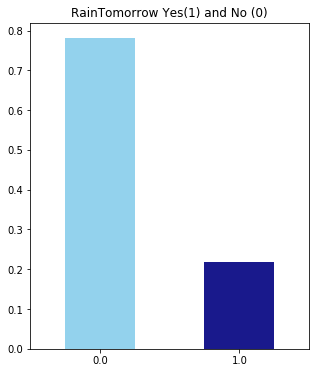

0.0    0.780854
1.0    0.219146
Name: RainTomorrow, dtype: float64

In [10]:
# Visualize RainTomorrow
fig = plt.figure(figsize = (5,6))
MiceImputed.RainTomorrow.value_counts(normalize = True).plot(kind='bar', color= ['skyblue','navy'], alpha = 0.9, rot=0)
plt.title('RainTomorrow Yes(1) and No (0)')
plt.show()

MiceImputed['RainTomorrow'].value_counts()/len(MiceImputed)

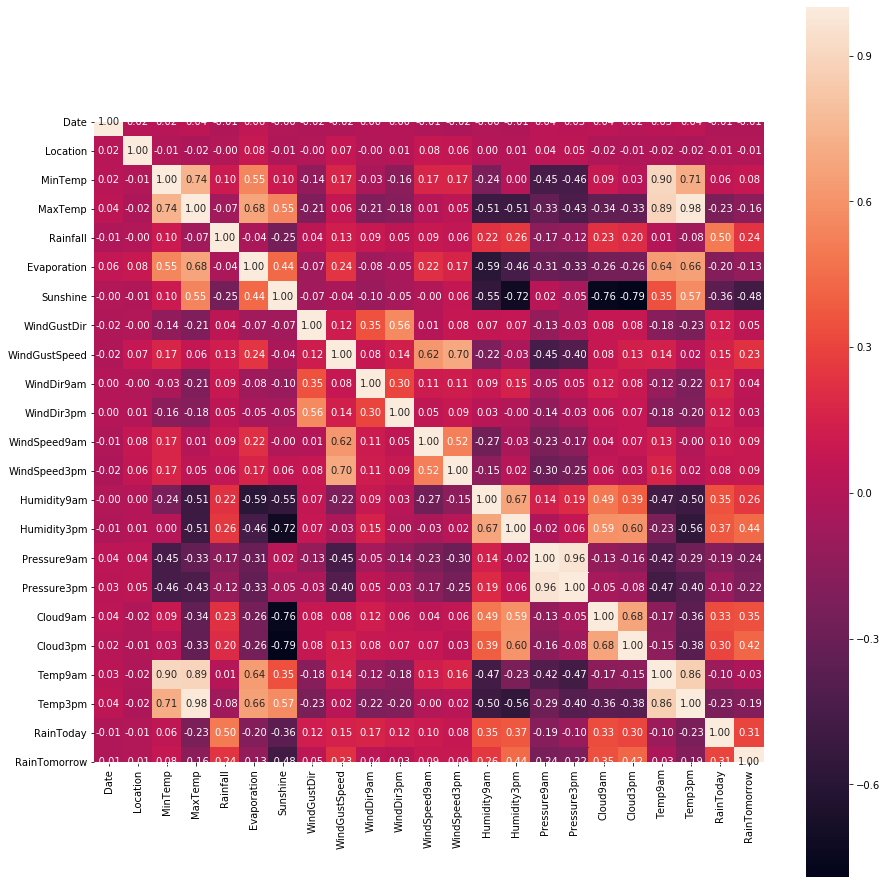

In [11]:
# Correlation matrix
plt.figure(figsize=(15,16))
ax = sns.heatmap(MiceImputed.corr(), square=True, annot=True, fmt='.2f')
ax.set_xticklabels(ax.get_xticklabels(), rotation=90)          
plt.show()

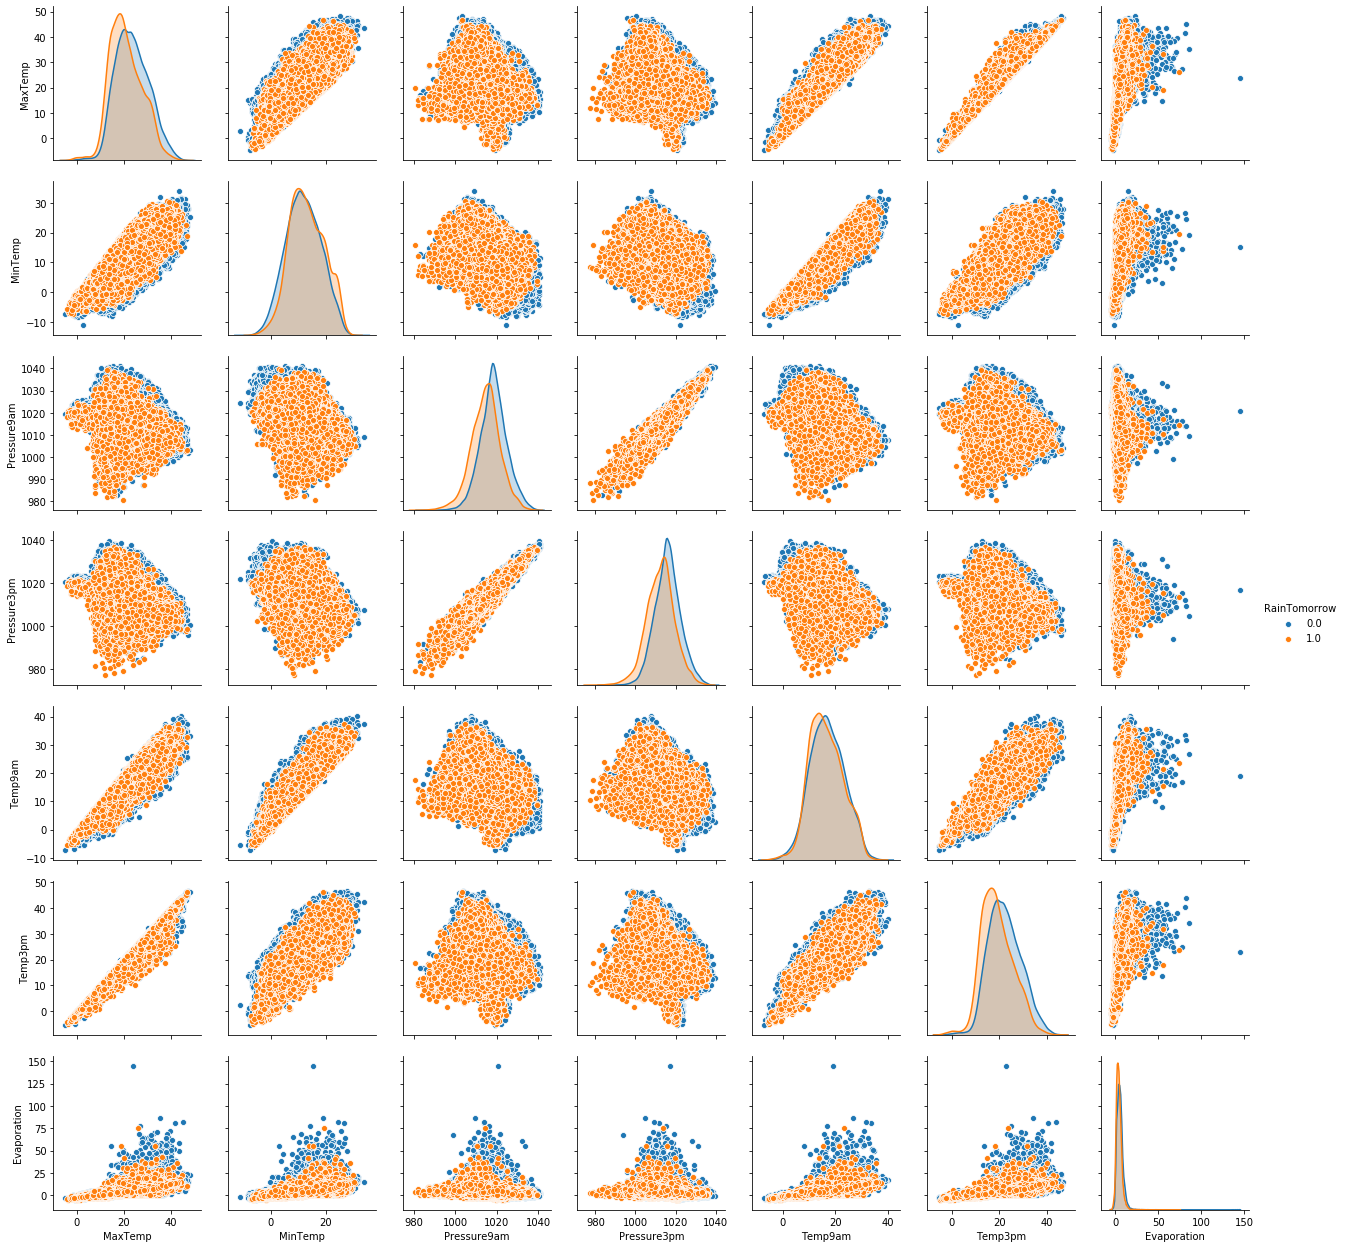

In [12]:
sns.pairplot( data=MiceImputed, vars=('MaxTemp','MinTemp','Pressure9am','Pressure3pm', 'Temp9am', 'Temp3pm', 'Evaporation'), 
             hue='RainTomorrow' )

In [13]:
# Features selection by wrapping method
from sklearn.feature_selection import SelectFromModel
from sklearn.ensemble import RandomForestClassifier as rf

X = MiceImputed.drop('RainTomorrow', axis=1)
y = MiceImputed['RainTomorrow']
selector = SelectFromModel(rf(n_estimators=100, random_state=0))
selector.fit(X, y)
support = selector.get_support()
features = X.loc[:,support].columns.tolist()
print(features)
print(rf(n_estimators=100, random_state=0).fit(X,y).feature_importances_)

['Sunshine', 'WindGustSpeed', 'Humidity3pm', 'Pressure9am', 'Pressure3pm', 'Cloud9am', 'Cloud3pm']
[0.03430823 0.02982202 0.03457928 0.03481107 0.03744615 0.03428995
 0.13686298 0.02110203 0.04577851 0.02164386 0.02178467 0.02354524
 0.02669468 0.03850173 0.12265759 0.04866613 0.05881648 0.05126964
 0.09098869 0.03387493 0.03710674 0.01544938]


## Training the models

In [33]:
X = MiceImputed[['Location', 'MinTemp', 'MaxTemp', 'Rainfall', 'Evaporation', 'Sunshine',
       'WindGustDir', 'WindGustSpeed', 'WindDir9am', 'WindDir3pm',
       'WindSpeed9am', 'WindSpeed3pm', 'Humidity3pm', 'Pressure9am',
       'Pressure3pm', 'Cloud9am', 'Cloud3pm', 'RainToday']]
y = MiceImputed['RainTomorrow']

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=101)

# Scale data
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaler.fit(X_train)
X_train = scaler.transform(X_train)
X_test = scaler.transform(X_test)

In [34]:
#Oversample the dataset

from imblearn.over_sampling import SMOTE

sm = SMOTE(random_state=101)
X_train_res, y_train_res = sm.fit_sample(X_train, y_train)

print('After OverSampling, the shape of train_X: {}'.format(X_train_res.shape))
print('After OverSampling, the shape of train_y: {} \n'.format(y_train_res.shape))

print("Before OverSampling, counts of label '1': {}".format(sum(y_train == 1)))
print("After OverSampling, counts of label '1': {}".format(sum(y_train_res == 1)))

print("Before OverSampling, counts of label '0': {}".format(sum(y_train == 0)))
print("After OverSampling, counts of label '0': {}".format(sum(y_train_res == 0)))

After OverSampling, the shape of train_X: (159050, 18)
After OverSampling, the shape of train_y: (159050,) 

Before OverSampling, counts of label '1': 22297
After OverSampling, counts of label '1': 79525
Before OverSampling, counts of label '0': 79525
After OverSampling, counts of label '0': 79525


In [16]:
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import LogisticRegression
# define models and parameters
model = LogisticRegression()
solvers = ['newton-cg', 'lbfgs', 'liblinear']
penalty = ['l1','l2']
c_values = [30, 10, 1.0, 0.1, 0.01]
# define grid search
grid = dict(solver=solvers,penalty=penalty,C=c_values)
grid_search = GridSearchCV(estimator=model, param_grid=grid, n_jobs=-1, cv=4, scoring='accuracy',error_score=0)
grid_result = grid_search.fit(X_train_res, y_train_res)
# summarize results
print("Best: %f using %s" % (grid_result.best_score_, grid_result.best_params_))

Best: 0.798114 using {'C': 0.01, 'penalty': 'l2', 'solver': 'liblinear'}


In [17]:
# Cross Validation
model = LogisticRegression(penalty='l1', solver='liblinear', C=30)

from sklearn.model_selection import cross_val_score

scores = cross_val_score(model, X_train_res,y_train_res, scoring='accuracy', cv=5)
scores

array([0.79669915, 0.79833386, 0.79842817, 0.79981138, 0.79698208])

Accuracy = 0.8078967872038132
F1-Score = 0.6446224935351224
              precision    recall  f1-score   support

         0.0       0.93      0.81      0.87     34058
         1.0       0.54      0.79      0.64      9580

    accuracy                           0.81     43638
   macro avg       0.74      0.80      0.76     43638
weighted avg       0.85      0.81      0.82     43638



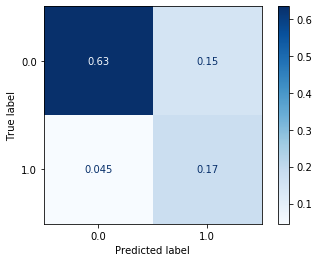

In [35]:
# Logistic Regression Model
from sklearn.metrics import classification_report, plot_confusion_matrix, accuracy_score, f1_score

logreg = LogisticRegression(penalty='l1', solver='liblinear')
logreg.fit(X_train_res, y_train_res)
y_pred = logreg.predict(X_test)

accuracy = accuracy_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred) 
print("Accuracy = {}".format(accuracy))
print("F1-Score = {}".format(f1))

print(classification_report(y_test, y_pred))

plot_confusion_matrix(logreg, X_test, y_test,cmap=plt.cm.Blues, normalize = 'all')

In [27]:
from sklearn.ensemble import RandomForestClassifier

test_error = []

for n in range(1,40):
    # Use n random trees
    model = RandomForestClassifier(n_estimators=n,max_features='auto', random_state=101)
    model.fit(X_train_res,y_train_res)
    test_preds = model.predict(X_test)
    test_error.append(1-accuracy_score(test_preds,y_test))

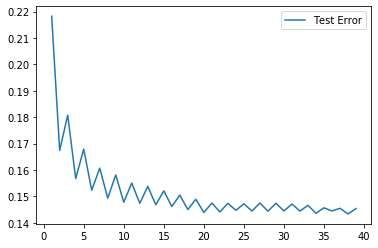

In [28]:
plt.plot(range(1,40),test_error,label='Test Error')
plt.legend()

Accuracy = 0.8780420734222467
F1-Score = 0.6815461943513643
              precision    recall  f1-score   support

         0.0       0.89      0.96      0.92     34058
         1.0       0.80      0.59      0.68      9580

    accuracy                           0.88     43638
   macro avg       0.85      0.78      0.80     43638
weighted avg       0.87      0.88      0.87     43638



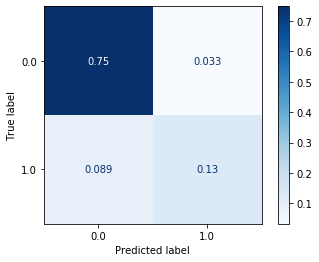

In [36]:
rfc = RandomForestClassifier(max_features = 'sqrt', max_depth=16, min_samples_leaf =1, 
                             min_samples_split = 2, n_estimators = 34, random_state=101)
rfc.fit(X_train, y_train)
y_pred = rfc.predict(X_test)

accuracy = accuracy_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred) 
print("Accuracy = {}".format(accuracy))
print("F1-Score = {}".format(f1))

print(classification_report(y_test, y_pred))

plot_confusion_matrix(rfc, X_test, y_test,cmap=plt.cm.Blues, normalize = 'all')

Accuracy = 0.8620239241028461
F1-Score = 0.6358633202298156
              precision    recall  f1-score   support

         0.0       0.88      0.95      0.91     34058
         1.0       0.76      0.55      0.64      9580

    accuracy                           0.86     43638
   macro avg       0.82      0.75      0.78     43638
weighted avg       0.85      0.86      0.85     43638



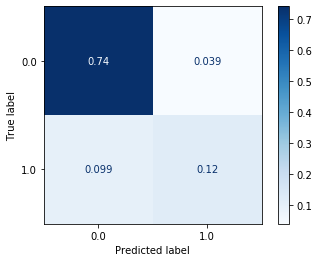

In [37]:
from xgboost import XGBClassifier

xgb = XGBClassifier(objective = 'binary:logistic')
xgb.fit(X_train, y_train)
y_pred = xgb.predict(X_test)

accuracy = accuracy_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred) 
print("Accuracy = {}".format(accuracy))
print("F1-Score = {}".format(f1))

print(classification_report(y_test, y_pred))

plot_confusion_matrix(xgb, X_test, y_test,cmap=plt.cm.Blues, normalize = 'all')

In [31]:
# define models and parameters
model = XGBClassifier(objective = 'binary:logistic')
n = [150,1000]
l_rate = [0.01, 0.6]
subsample = [0.3, 0.9]
max_depth = [3, 5, 7, 9]
colsample_bytree = [0.5, 0.9]
min_child_weight = [1, 2, 3]

# define grid search
grid = dict(n_estimators=n, learning_rate=l_rate, subsample=subsample, max_depth=max_depth, colsample_bytree=colsample_bytree, min_child_weight=min_child_weight)
grid_search = GridSearchCV(estimator=model, param_grid=grid, n_jobs=-1, cv=4, scoring='accuracy',error_score=0)
grid_result = grid_search.fit(X_train_res, y_train_res)
# summarize results
print("Best: %f using %s" % (grid_result.best_score_, grid_result.best_params_))

KeyboardInterrupt: 